<a href="https://colab.research.google.com/github/PeixotoJr/APD/blob/main/Clusterizacao_Vinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de Bibliotecas:

* numpy, pandas, matplotlib.pyplot: Para manipulação de dados e visualização.
* StandardScaler, KMeans, AgglomerativeClustering,
* DBSCAN: Modelos de clustering e escalonamento.
dendrogram, linkage: Para visualizar hierarquias de clusters (utilizados no clustering hierárquico).
* PCA: Para redução de dimensionalidade.
* seaborn: Para visualizações gráficas.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Carregamento dos Dados

In [ ]:
df=pd.read_csv('wine-clustering.csv')
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


# Visualização Inicial

São gerados gráficos de dispersão, visualizando as relações entre o teor de ácido málico (Malic_Acid) e a prolina (Proline), duas das variáveis da base de dados.

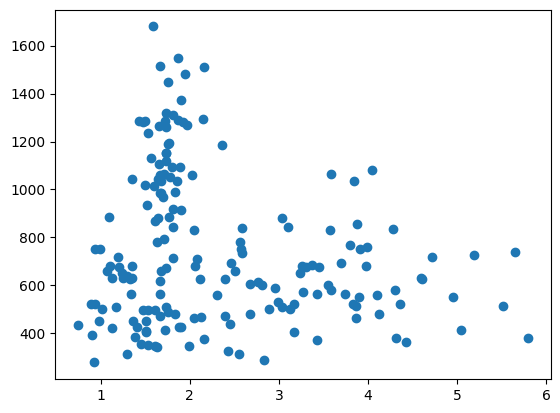

In [ ]:
x_axis=df.loc[:,['Malic_Acid']]
y_axis=df.loc[:,['Proline']]
plt.scatter(x_axis,y_axis)

# Gráfico de Dispersão de  pares (Pairplot):

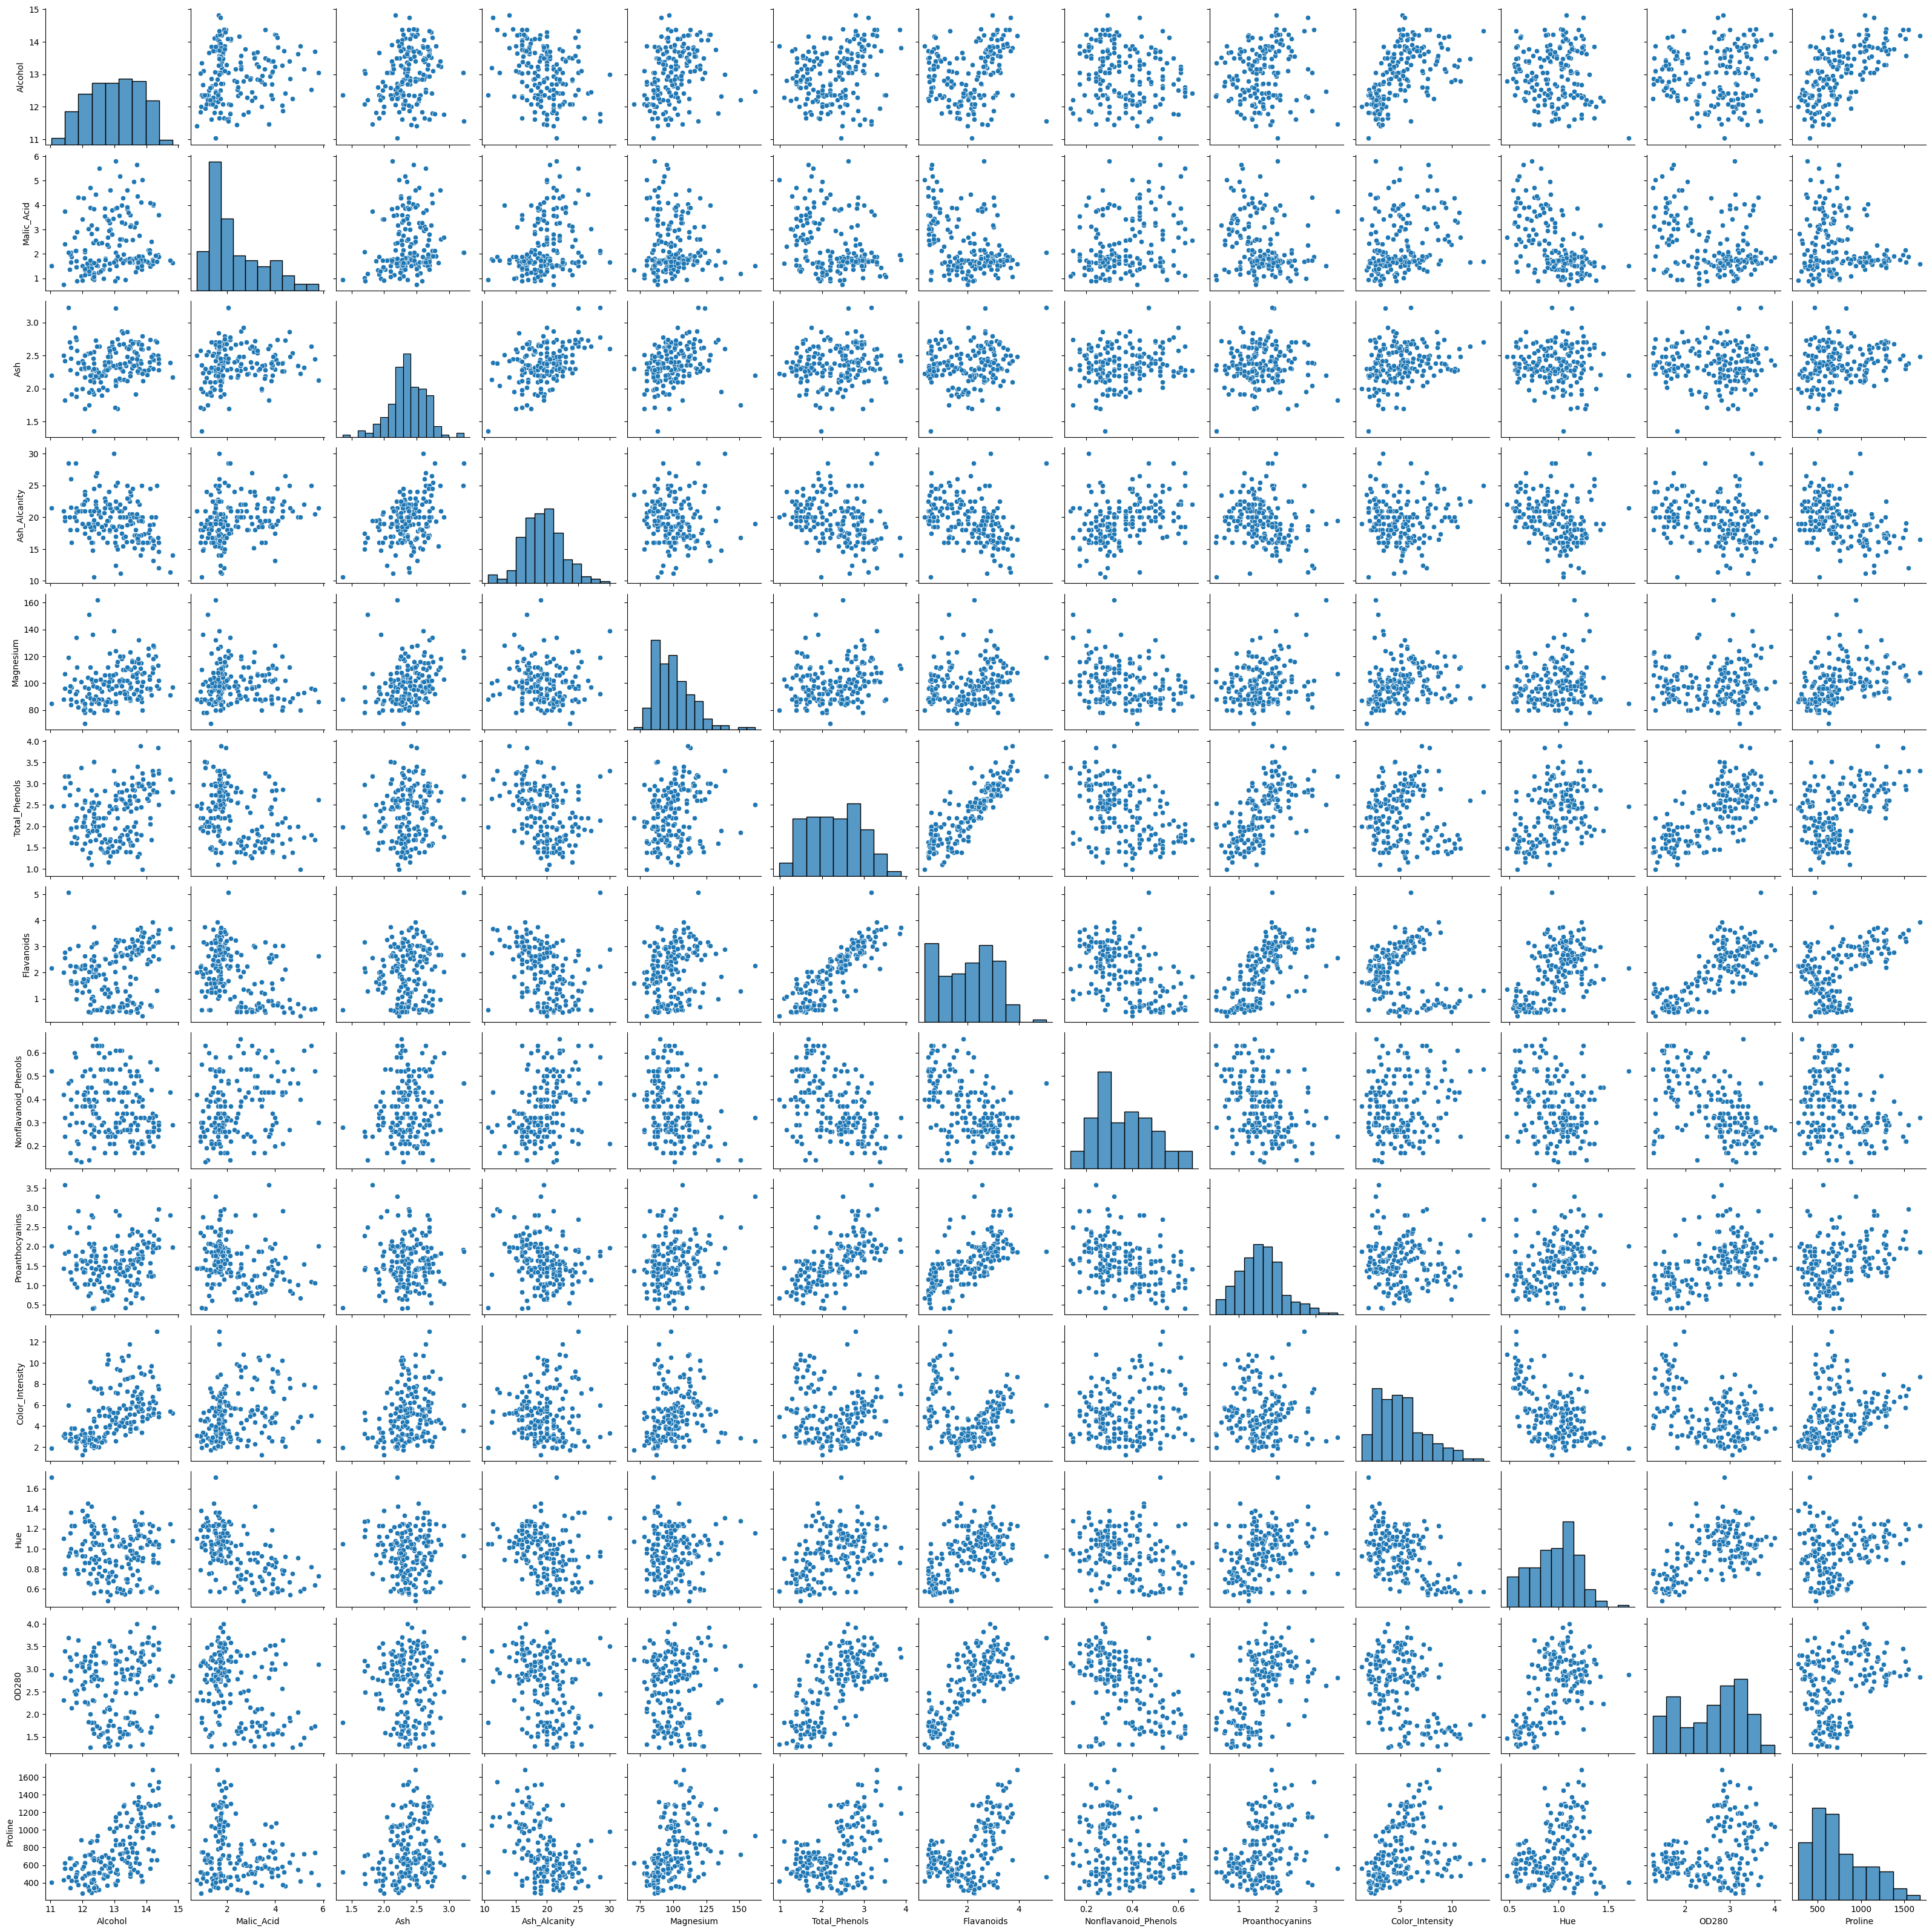

In [ ]:
sns.pairplot(df, kind="scatter")

# Clusterização com K-Means:

In [ ]:
Kmeans=KMeans(n_clusters=5,init='k-means++')
Kmeans.fit(df)

KMeans(n_clusters=5)

In [ ]:
pred=Kmeans.predict(df)

In [ ]:
pred

array([2, 2, 2, 0, 4, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 4, 4, 4,
       2, 2, 4, 4, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4,
       4, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 4, 3, 1, 3, 3, 4,
       1, 1, 4, 4, 4, 3, 3, 2, 4, 3, 3, 1, 4, 3, 3, 4, 1, 1, 1, 3, 1, 1,
       4, 1, 3, 3, 1, 3, 3, 2, 1, 3, 1, 3, 4, 1, 3, 3, 4, 3, 1, 1, 3, 4,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 4, 4, 1, 1, 1, 1, 4, 1, 1, 4, 4, 3, 1, 1, 1, 1, 3, 3, 4,
       1, 4, 3, 4, 1, 1, 1, 4, 1, 4, 1, 1, 4, 4, 4, 1, 1, 3, 1, 4, 4, 4,
       4, 1], dtype=int32)

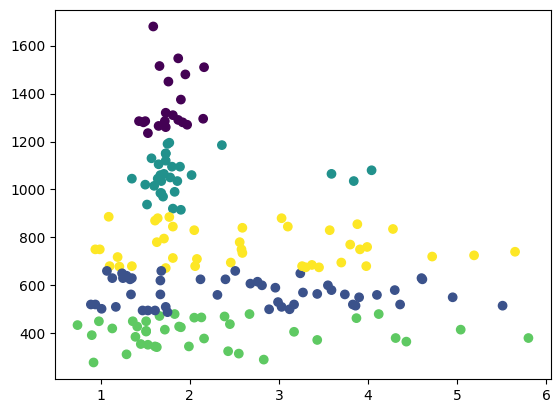

In [ ]:
plt.scatter(x_axis,y_axis,c=pred)

# Criação de Coluna com os Clusters

In [ ]:
df['pred']=pred
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  pred  
0   3.92     1065     2  
1   3.40     1050     2  
2   3.17     1185     2  
3   3.45     1480     0  
4   2.93      735     4

# Visualização dos Clusters (Pairplot com Cores):

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

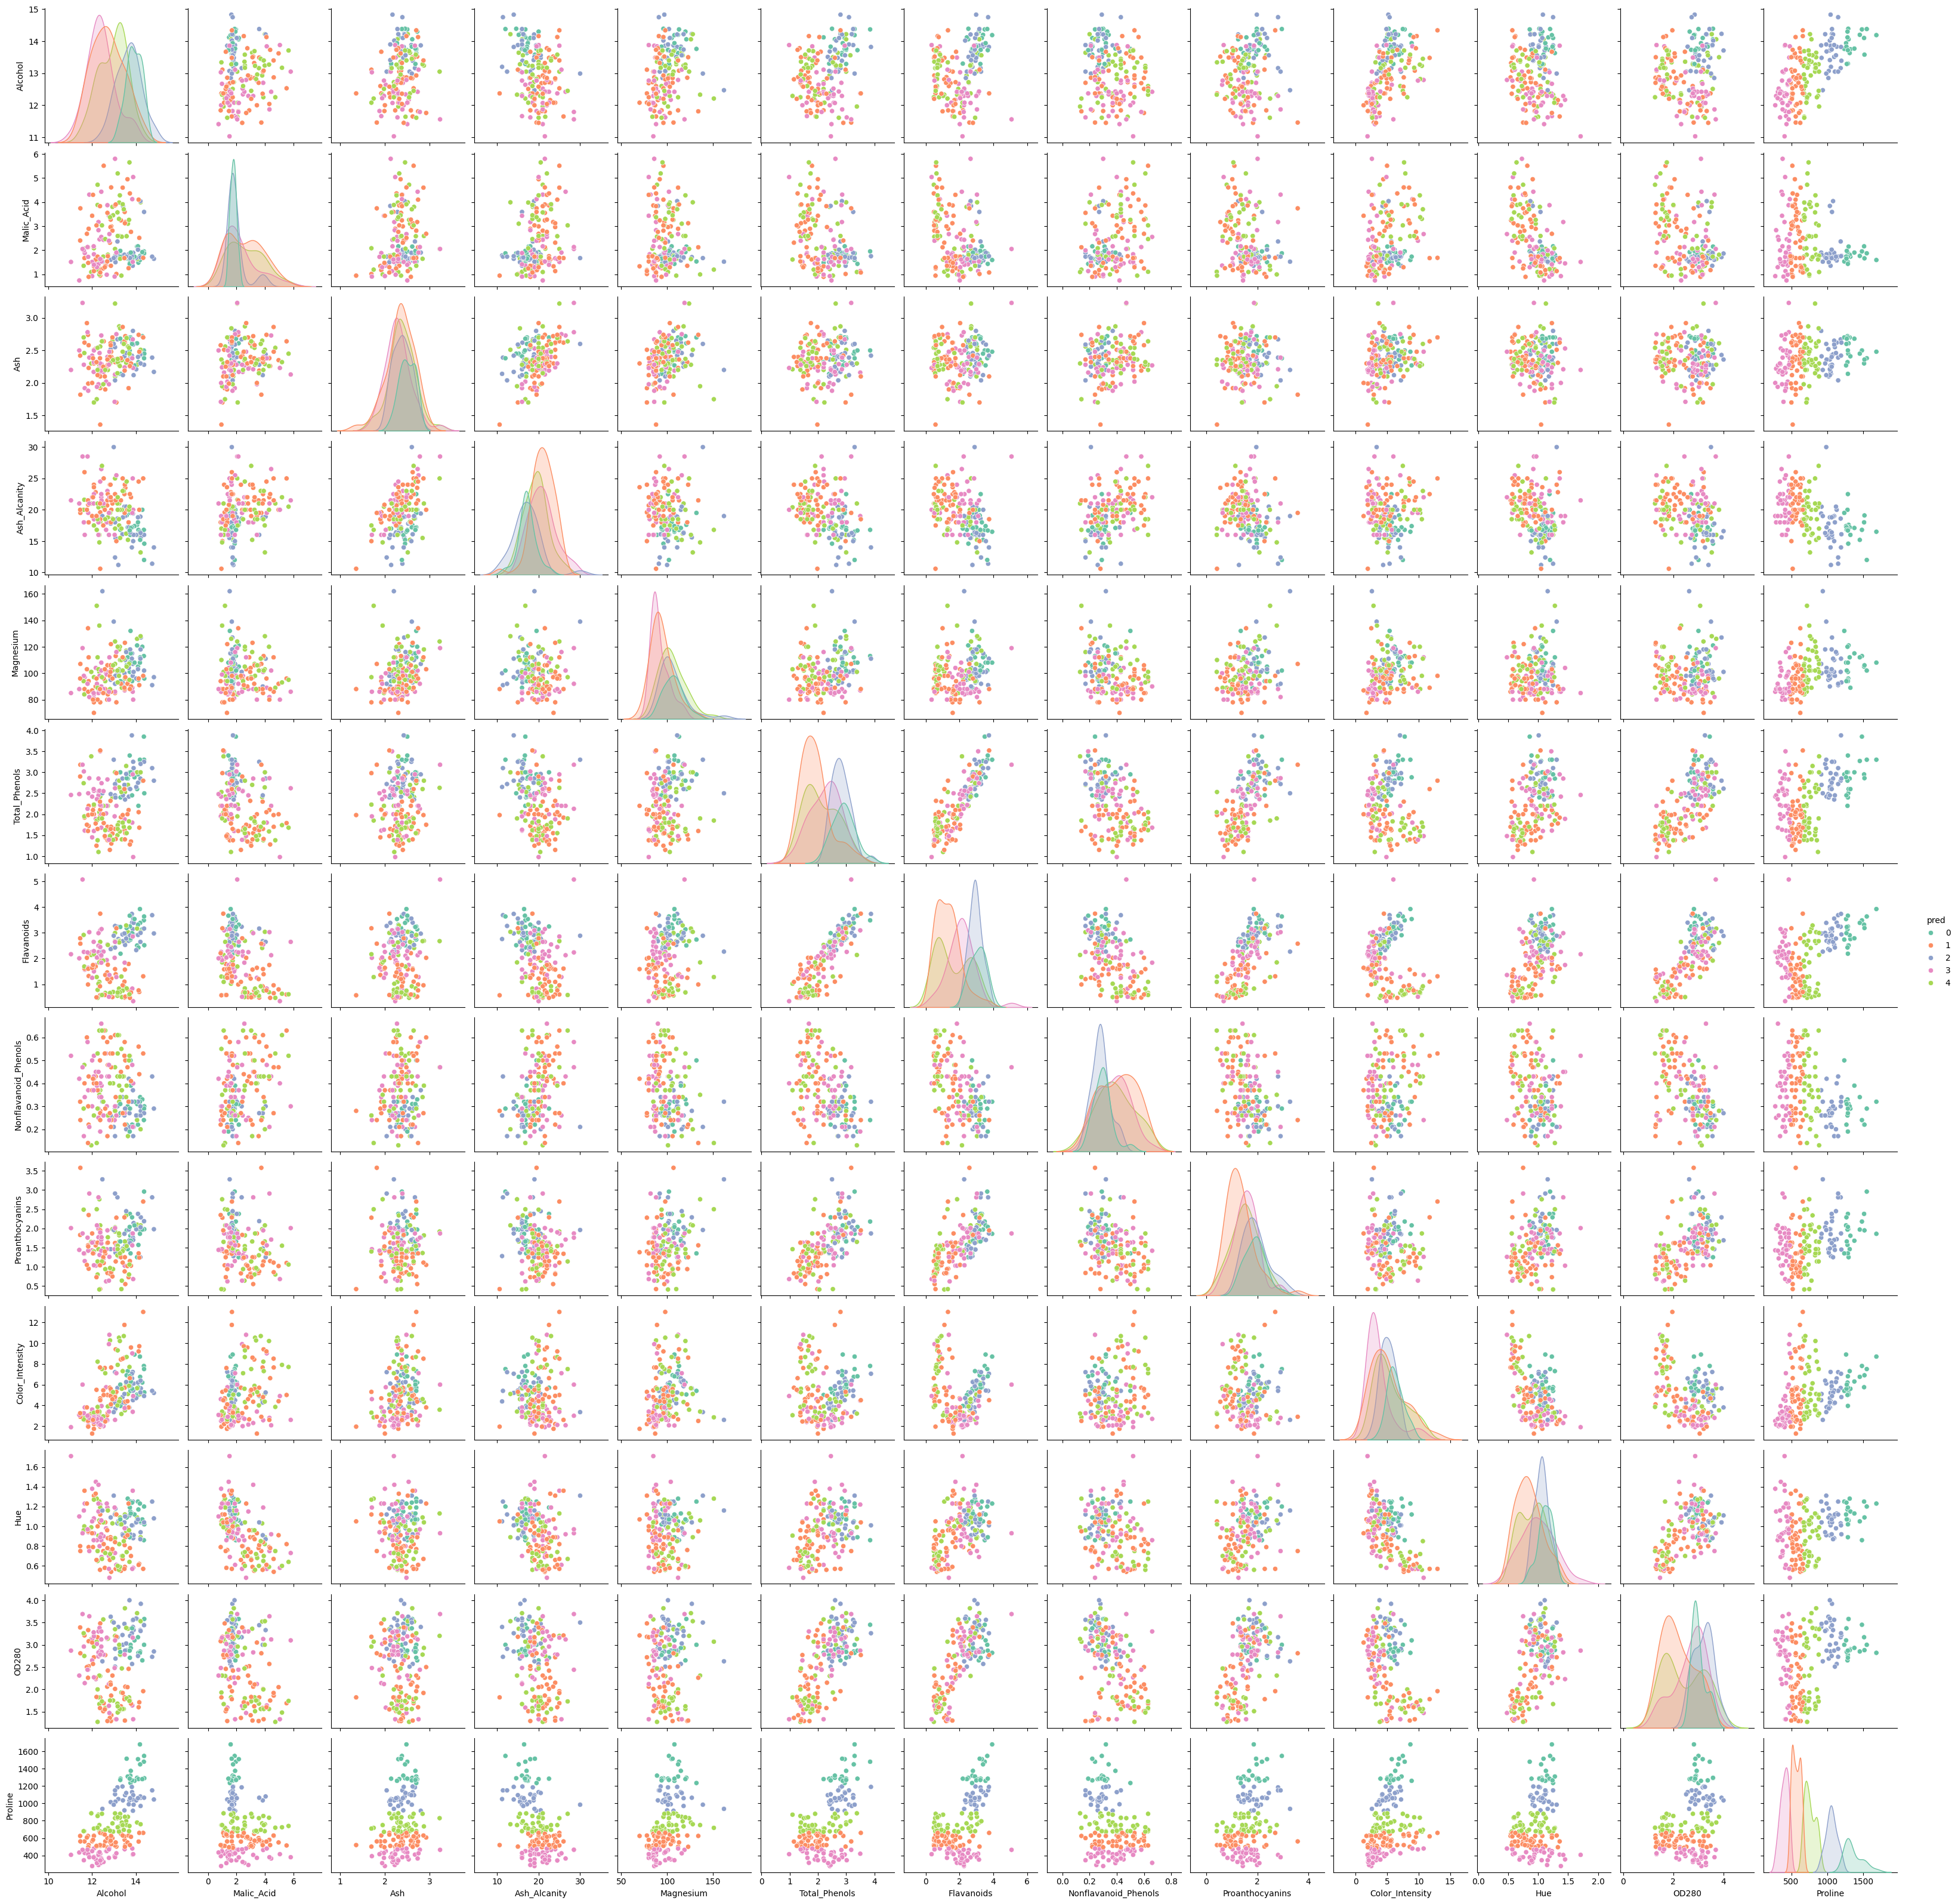

In [ ]:
sns.pairplot(df, kind="scatter", hue='pred', palette="Set2")
plt.show()

In [ ]:
df['pred'].value_counts()

pred
2    57
0    50
1    36
4    28
3     7
Name: count, dtype: int64

In [ ]:
df


Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  pred  
0     3.92     1065     1  
1     3.40     1050     1  
2     3.17     1185     1  
3     3.45     1480     3  
4     2.93      735     0  
..     ...      ...   ...  
173   1.74      740     0  
174   1.56      750     4  
175   1.56      835     4  
176   1.62      840     4  
177   1.60      560     0  

[178 rows x 14 columns]